In [16]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [17]:
import pandas as pd

df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')
facebook_fake = pd.read_csv('facebook-fact-check.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [18]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
facebook_fake.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [20]:
df_true.shape, df_fake.shape,facebook_fake.shape

((21417, 4), (23481, 4), (2282, 12))

In [21]:
df_true['class']=1
df_fake['class']=0

We merge our 2 datasets of real news and fake news with a new feature depicting which news is real news and which are fake

In [22]:
merged_df = pd.concat([df_true,df_fake])

In [23]:
merged_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


After the merge we want to check the features to see if any contain NaN which can throw our model off below we can see there are no NaN within our dataset

In [24]:
merged_df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

After the merge we need to check the balance between our dataset between real and fake, because if one is significantly larger than the other we can overfit to our data

<AxesSubplot:xlabel='class', ylabel='count'>

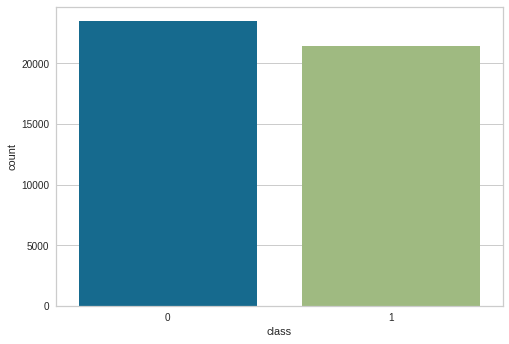

In [29]:
import seaborn as sns
sns.countplot(merged_df['class'])

In [30]:
sample_news_df = merged_df.sample(10000, random_state=786).reset_index(drop=True)
sample_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10000 non-null  object
 1   text     10000 non-null  object
 2   subject  10000 non-null  object
 3   date     10000 non-null  object
 4   class    10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


We would now need to initilize the training environment that creates teh transformation pipline. This setup needs to be called before we train or execute and function 

In [32]:
sample_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [34]:
from pycaret.nlp import *

news_nlp = setup(data = sample_news_df, target = 'text', session_id =123)

Description,Value
session_id,123
Documents,10000
Vocab Size,35185
Custom Stopwords,False


In [35]:
%time
lda = create_model('lda',multi_core=True)

In [36]:
%time
lda_df = assign_model(lda)

In [38]:
plot_model(lda, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



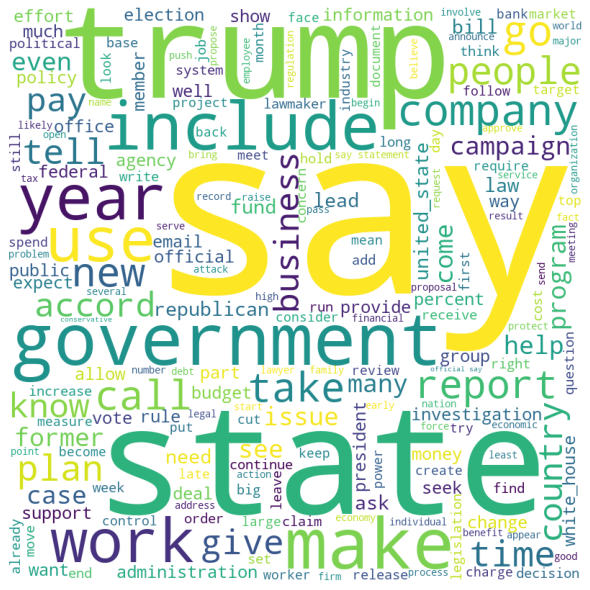

In [39]:
plot_model(lda, plot = 'wordcloud')

In [42]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.161491  0.061004       1        1  33.719431
2      0.053918  0.125448       2        1  24.496700
0      0.148647 -0.032500       3        1  22.732578
1     -0.041074 -0.153952       4        1  19.051290, topic_info=          Term          Freq         Total Category  logprob  loglift
80         say  36955.000000  36955.000000  Default  30.0000  30.0000
493     police   2405.000000   2405.000000  Default  29.0000  29.0000
557      trump  12160.000000  12160.000000  Default  28.0000  28.0000
163   election   5249.000000   5249.000000  Default  27.0000  27.0000
1296   company   2008.000000   2008.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
397   military    871.609689   2456.824309   Topic4  -5.8121   0.6218
227   official   1019.528082   4421.905471   Topic4  -5.6554   0.1908
90        take   1061.362712   6742.583695   Topic4  -5.6152  -0.1909
99         use    969.378702   4257.242092   Topic4  -5.7058   0.1783
124       call    871.566741   5344.805058   Topic4  -5.8122  -0.1556

[389 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
425       1  0.165616    accord
425       2  0.183761    accord
425       3  0.378409    accord
425       4  0.271847    accord
2         1  0.903208  actually
...     ...       ...       ...
2709      4  0.929313     wound
292       1  0.196649      year
292       2  0.260458      year
292       3  0.320350      year
292       4  0.222597      year

[783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

/home/chris/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/chris/anaconda3/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/chris/anaconda3/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are dep